In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
amazon = pd.read_csv(" https://raw.githubusercontent.com/pa1battula/PavanKumarbattula_IT533/main/Amazon_toy.csv ", encoding="ISO-8859-1")
amazon.dropna(inplace=True)


In [ ]:
amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold ?|? Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold ?|? Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...
5,7b8a04095b5e4984c57fd45eb327feb1,100 Deep Red Rose Silk Petals Confetti - Weddi...,Shatchi,0.64,6,new,10,2,4.1,"Party Supplies > Banners, Stickers & Confetti ...",http://www.amazon.co.uk/Valentines | http://ww...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,Technical Details Manufacturer recommended age...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,http://www.amazon.co.uk/300-Deep-Silk-Rose-Pet...,None,Five Stars // 5.0 // 2 Dec. 2015 // By\n \n...


In [ ]:
corr = amazon.corr(numeric_only=True);
corr;

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5
price,1.000000,-0.018236,-0.024008,-0.005889,0.013213
number_available_in_stock,-0.018236,1.000000,0.215193,-0.008333,-0.009538
number_of_reviews,-0.024008,0.215193,1.000000,0.020904,-0.089078
number_of_answered_questions,-0.005889,-0.008333,0.020904,1.000000,0.001501
average_review_rating_of_5,0.013213,-0.009538,-0.089078,0.001501,1.000000


In [ ]:
corr = amazon.corr()
corr

<ipython-input-7-3115107eba21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = amazon.corr()


,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5
price,1.000000,-0.018236,-0.024008,-0.005889,0.013213
number_available_in_stock,-0.018236,1.000000,0.215193,-0.008333,-0.009538
number_of_reviews,-0.024008,0.215193,1.000000,0.020904,-0.089078
number_of_answered_questions,-0.005889,-0.008333,0.020904,1.000000,0.001501
average_review_rating_of_5,0.013213,-0.009538,-0.089078,0.001501,1.000000


<ipython-input-9-a66a880def55>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<Axes: >

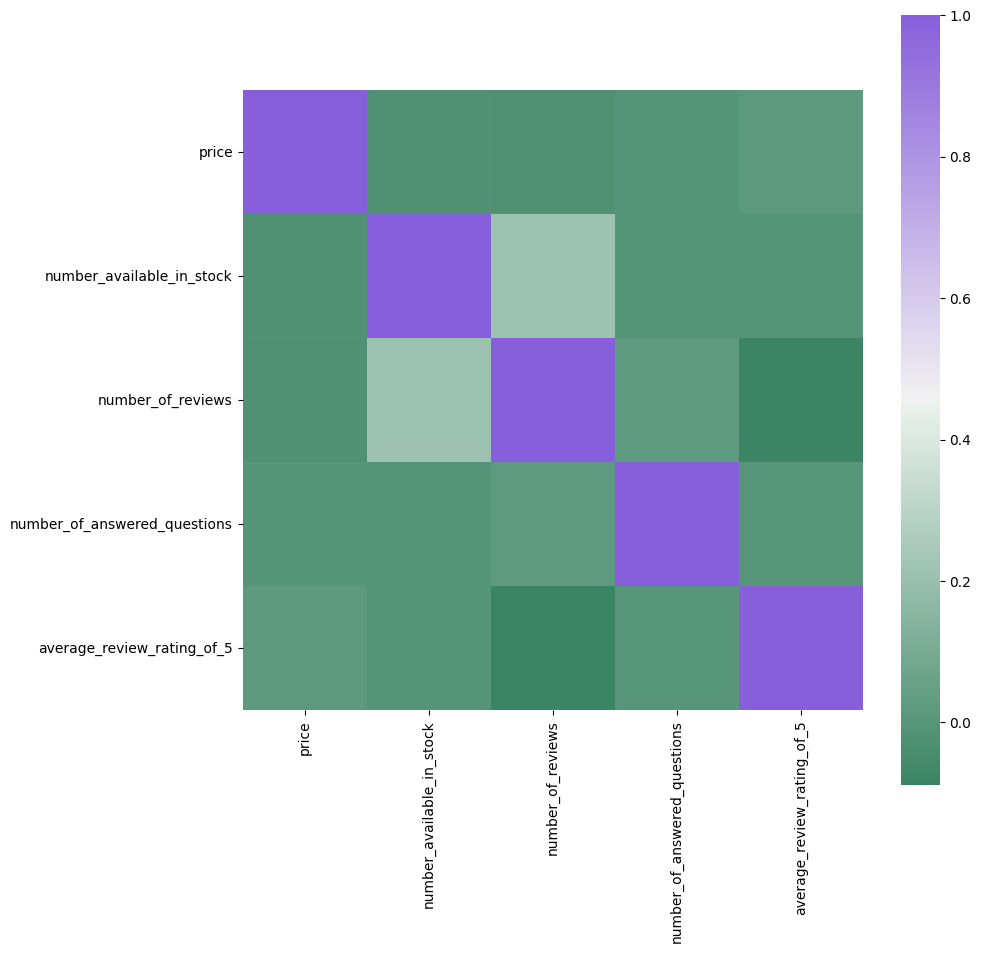

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),
            cmap = sns.diverging_palette(150, 275, as_cmap = True), square = True, ax = ax)

In [ ]:
bins = np.linspace(amazon.average_review_rating_of_5.min(), amazon.average_review_rating_of_5.max(), 3)

In [ ]:
# Perform binning on average_review_rating_of_5.
bins = np.linspace(amazon.average_review_rating_of_5.min(), amazon.average_review_rating_of_5.max(), 3)
# Define the two labels.
labels = ['Low Rating', 'High Rating']
# Add bins to the dataset.
amazon['bins'] = pd.cut(amazon['average_review_rating_of_5'], bins = bins, labels = labels, include_lowest = True)


In [ ]:
X1 = amazon['number_of_reviews'];
y1 = amazon['number_available_in_stock'];
X1 = sm.add_constant(X1);
amazon.model1 = sm.OLS(y1, X1).fit();
amazon.model1_summary = amazon.model1.summary();
print(amazon.model1_summary);

                                OLS Regression Results                               
Dep. Variable:     number_available_in_stock   R-squared:                       0.046
Model:                                   OLS   Adj. R-squared:                  0.046
Method:                        Least Squares   F-statistic:                     306.4
Date:                       Sat, 10 Feb 2024   Prob (F-statistic):           5.01e-67
Time:                               03:06:03   Log-Likelihood:                -22763.
No. Observations:                       6312   AIC:                         4.553e+04
Df Residuals:                           6310   BIC:                         4.554e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

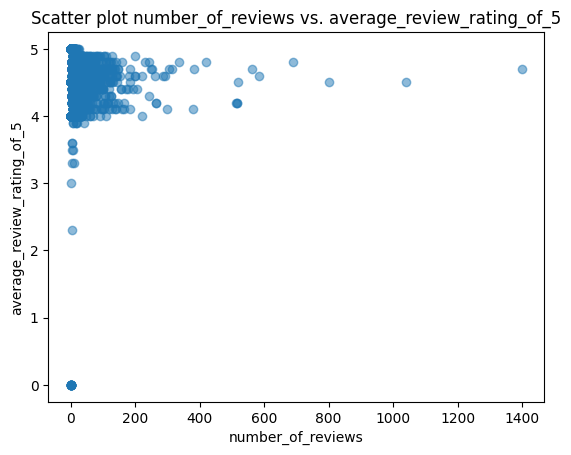

In [ ]:
plt.scatter(amazon['number_of_reviews'], amazon['average_review_rating_of_5'], alpha=0.5)
plt.title('Scatter plot number_of_reviews vs. average_review_rating_of_5')
plt.xlabel('number_of_reviews')
plt.ylabel('average_review_rating_of_5')
plt.show()

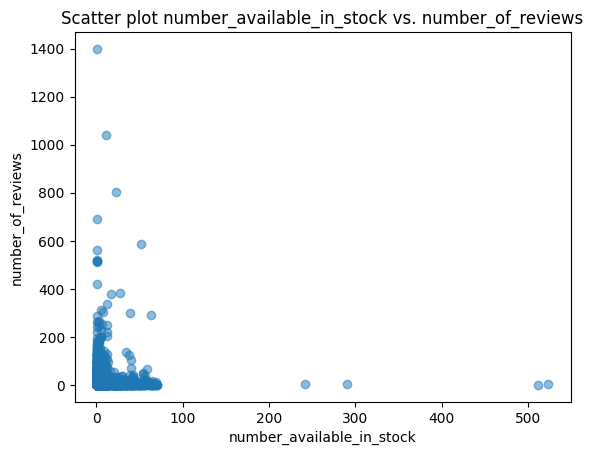

In [ ]:
plt.scatter(amazon['number_of_answered_questions'], amazon['number_of_reviews'], alpha=0.5)
plt.title('Scatter plot number_available_in_stock vs. number_of_reviews')
plt.xlabel('number_available_in_stock')
plt.ylabel('number_of_reviews')
plt.show()

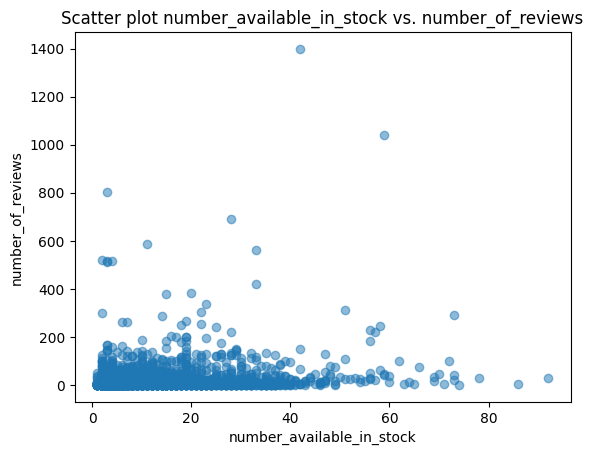

In [ ]:
plt.scatter(amazon['number_available_in_stock'], amazon['number_of_reviews'], alpha=0.5)
plt.title('Scatter plot number_available_in_stock vs. number_of_reviews')
plt.xlabel('number_available_in_stock')
plt.ylabel('number_of_reviews')
plt.show()

In [ ]:

# Perform binning on average_review_rating_of_5.
bins = np.linspace(amazon.average_review_rating_of_5.min(), amazon.average_review_rating_of_5.max(), 3)
2.
# Define the two labels.
labels = ['Low Rating', 'High Rating']
3.
# Add bins to the dataset.
amazon['bins'] = pd.cut(amazon['average_review_rating_of_5'], bins = bins, labels = labels, include_lowest = True)
4.
# Only use bins and number_of_reviews.
amazon = amazon[['bins', 'number_of_reviews']]

5.
# Use first 5,000 rows for training set and last 1,312 rows for testing set.
dfTrain = amazon[:5000]
dfTest = amazon[5000:]

6.
# Separate the label and features.
train_y = np.asarray(dfTrain['bins'])
train_x = np.asarray(dfTrain.drop(['bins'], 1))
test_y = np.asarray(dfTest['bins'])
test_x = np.asarray(dfTest.drop(['bins'], 1))
train_x
7.
# Normalize the inputs.
means = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)
train_x = (train_x - means)/std
test_x = (test_x - means)/std
8.
# Build the model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( )
9.
# Train the model.
model.fit(train_x, train_y)

10.
# Determine the accuracy of the model.
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%")

accuracy =  99.6951219512195 %


<ipython-input-24-3d845c22c04c>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_x = np.asarray(dfTrain.drop(['bins'], 1))
<ipython-input-24-3d845c22c04c>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_x = np.asarray(dfTest.drop(['bins'], 1))
